In [1]:
# import the necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# load in the cleaned data for ML models
df2 = pd.read_csv("ML_diabetes_data.csv", index_col=[0])

In [3]:
df2.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
1,M,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,[20 - 30)
2,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
3,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
4,M,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,[30 - 40)


In [4]:
# encode labels as numeric categories
le1 = LabelEncoder()
df2['Gender'] =le1.fit_transform(df2['Gender'])
le2 = LabelEncoder()
df2['CLASS'] =le2.fit_transform(df2['CLASS'])
le3 = LabelEncoder()
df2['age_range'] =le3.fit_transform(df2['age_range'])


In [5]:
le1.classes_

array(['F', 'M'], dtype=object)

In [6]:
le2.classes_


array(['N', 'P', 'Y'], dtype=object)

In [7]:
le3.classes_

array(['[20 - 30)', '[30 - 40)', '[40 - 50)', '[50 - 60)', '[60 - 70)',
       '[70 - 80)', '[80 - 90)', '[90 - 100)'], dtype=object)

In [8]:
df2

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
1,1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0,0
2,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
3,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
4,1,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2,6
996,1,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2,1
997,1,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2,1
998,1,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2,2


The results are on different scales, as observed above. HbA1c is reported as a percentage in the lab, the reference range for creatinine is markedly larger than the rest of the analytes. 

This is where scaling comes in. We will use the MinMaxScaler() which will transform the features between 0 and 1.

In [9]:
#define scaler
scaler = MinMaxScaler()

In [10]:
# define columns to scale 
columns_to_scale = ['Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
columns_scaled = ['Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']

scale_values = df2[columns_to_scale].values
scaled_array = scaler.fit_transform(scale_values)

#create df_2 with scaled features
df2_scaled = pd.DataFrame(scaled_array, columns=columns_scaled)
df2_scaled

,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565
...,...,...,...,...,...,...,...,...,...
995,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,0.382609
996,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,0.633043
997,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,0.292174
998,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,0.747826


In [11]:
# concatenate df2 and df2_scaled to form df3
df3 = pd.concat([df2,df2_scaled],axis=1)
df3

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,...,age_range,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,...,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,...,0,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,...,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,...,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,1,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,...,1,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,...,6,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,0.382609
996,1,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,...,1,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,0.633043
997,1,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,...,1,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,0.292174
998,1,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,...,2,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,0.747826


In [12]:
# define training and testing sets
X = df3[['Gender','age_range','Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']].values
y = df3['CLASS'].values
train_set, test_set,train_label,test_label = train_test_split(X,y,test_size=0.20,random_state=0)

In [13]:
X[0]

array([0.        , 4.        , 0.109375  , 0.05037783, 0.26490066,
       0.40776699, 0.04444444, 0.22680412, 0.11458333, 0.01146132,
       0.17391304])

In [14]:
unique_classes = np.unique(y)
print(unique_classes)

[0 1 2]


In [37]:
# define machine learning models to compare performances
models = []
models.append(('LR', LogisticRegression(solver ='lbfgs',multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XGB', XGBClassifier()))

In [38]:
# define lists to hold results and the names of the model
results = []
names = []

In [39]:
#evaluate multiple machine learning algorithms using cross validation
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10)
    cv_results = model_selection.cross_val_score(model, X, y,cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})". format(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.8200000000000001 (0.3306055050963308)
KNN: 0.7809999999999999 (0.3497270364155451)
NB: 0.8220000000000001 (0.2690278795961489)
SVC: 0.783 (0.35273361053350155)
RFC: 0.8400000000000001 (0.325791344268076)
DTR: 0.844 (0.2787184959775723)
XGB: nan (nan)



1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\BROWN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\BROWN\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\BROWN\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [0 2]



In [41]:
# further explore the XGboost model

XGBClassifier_model = XGBClassifier()
XGBClassifier_model_fitted = XGBClassifier_model.fit(train_set,train_label)
XGBClassifier_model_prediction = XGBClassifier_model.predict(test_set)

In [42]:
df3['CLASS'].unique() #0 means No diabetes, 1 means predicted, 2 means diabetes

array([0, 1, 2])

In [43]:
#Print accuraccy score of the classifier
print('XGB Classifier Accuracy Score:\n', accuracy_score(test_label, XGBClassifier_model_prediction))

XGB Classifier Accuracy Score:
 0.995


In [44]:
# print classification report for XGB Classifier
print('XGB Classifier Report:\n', classification_report(test_label,XGBClassifier_model_prediction,target_names=['0','1','2']))

XGB Classifier Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.93         8
           2       0.99      1.00      1.00       176

    accuracy                           0.99       200
   macro avg       1.00      0.96      0.98       200
weighted avg       1.00      0.99      0.99       200



Overall, the model seems to perform very well, with high precision, recall, and F1-scores for most classes, and a high overall accuracy of 0.99. However, it's worth investigating the lower recall for class 1 to understand why some instances of this class were not correctly predicted.

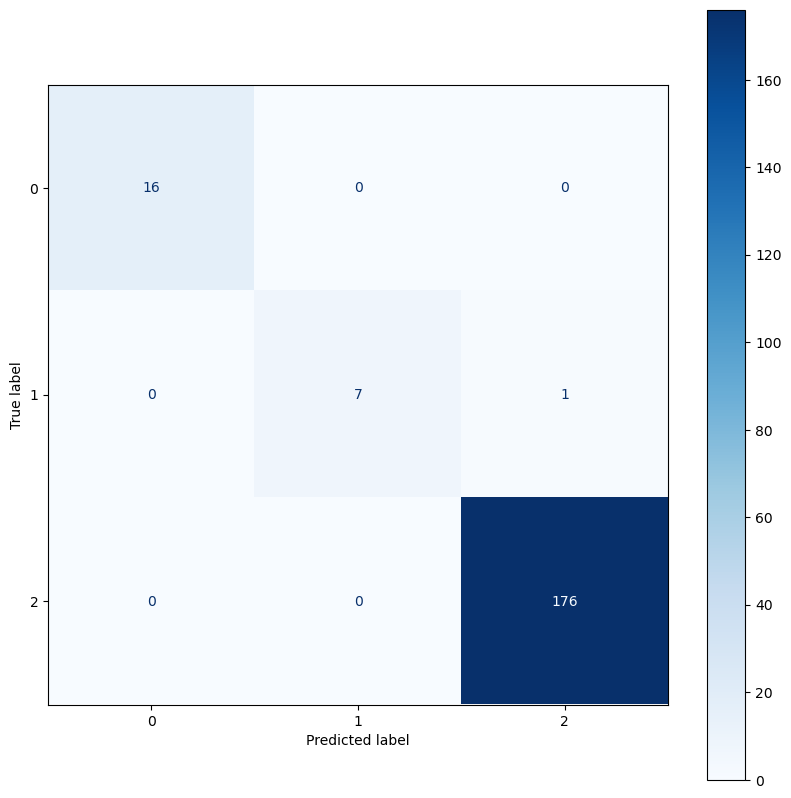

In [46]:
# Plot confusion matrix for XGBClassifier
XGBClassifier_matrix = confusion_matrix(test_label,XGBClassifier_model_prediction)
XGBClassifier_confusion_matrix_display = ConfusionMatrixDisplay(XGBClassifier_matrix)
fig, ax = plt.subplots(figsize=(10,10))
XGBClassifier_confusion_matrix_display.plot(cmap=plt.cm.Blues,ax=ax)

Model Explanation using SHAP

SHAP (SHapley Additive exPlanations) library tries to explain the predictions of an XGBoost classifier model. SHAP is a popular tool for understanding the contribution of each feature to a model's output.
  

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


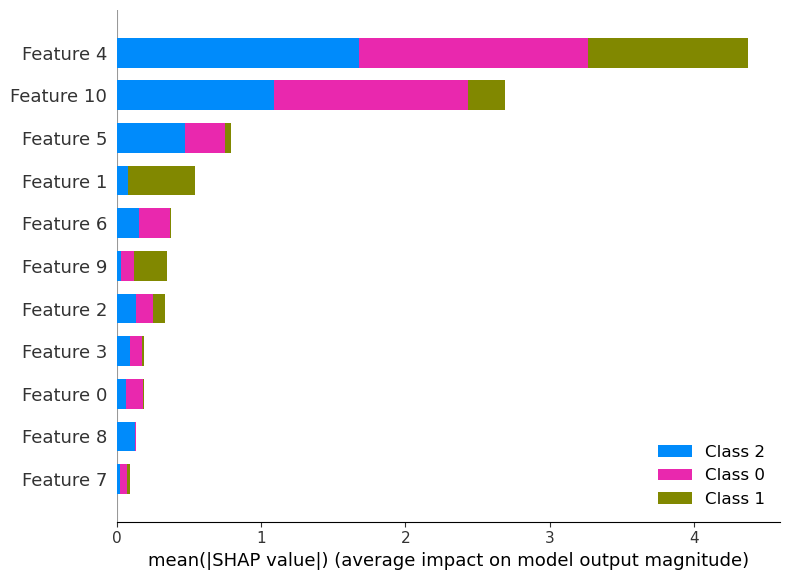

In [47]:
# Use shap to explain the XGB classifier
explainer = shap.TreeExplainer(XGBClassifier_model_fitted)
shap_values = explainer.shap_values(test_set)

shap.summary_plot(shap_values, test_set)

Shap shows that the top contributors to the model are feature 4 and 10 which tallies with HbA1c and BMI respectively. They were significant for predicting classes 0, 1 and 2.
 
This is consistent with real life medical setting where HbA1c and BMI are significant in diagnosing diabetes and the model was able to learn that.